In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
iris = sns.load_dataset('iris')
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [27]:
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

<img src="iris_pics.svg" alt="Iris pictures" width="500">

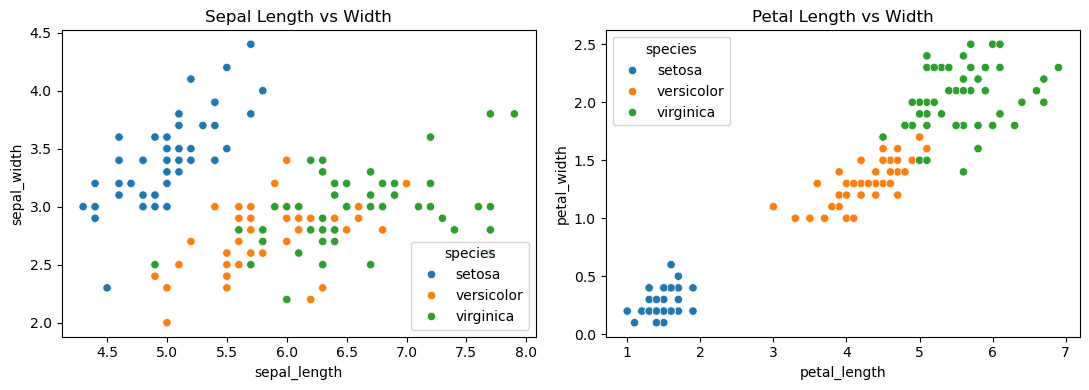

In [28]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11, 4))

sns.scatterplot(data=iris, x='sepal_length', y='sepal_width', hue='species', ax=ax1)
ax1.set_title('Sepal Length vs Width')

sns.scatterplot(data=iris, x='petal_length', y='petal_width', hue='species', ax=ax2)
ax2.set_title('Petal Length vs Width')

plt.tight_layout()
plt.show()

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression

In [30]:
X = iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = iris['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [31]:
model = LogisticRegression(random_state=42, max_iter=100)
model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [32]:
y_pred = model.predict(X_test)

In [33]:
score = f1_score(y_test, y_pred, average='macro')
score

1.0

In [34]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

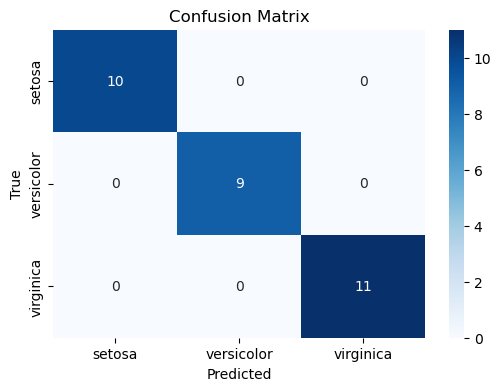

In [35]:
plt.figure(figsize=(6,4))
species_names = np.unique(y_test)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=species_names,
            yticklabels=species_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()